<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2004%20-%20Multistep%20Methods/404_Adams%20Moulton%20Population%20Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Step Adams Moulton 
#### John S Butler 
john.s.butler@tudublin.ie  
[Course Notes](https://johnsbutler.netlify.com/files/Teaching/Numerical_Analysis_for_Differential_Equations.pdf)    [Github](https://github.com/john-s-butler-dit/Numerical-Analysis-Python)


This notebook implements the 1 step Adams Moulton method for three different population intial value problems.

# Formula
The general 1 step Adams-Moulton method for the first order differential equation
\begin{equation} y^{'} = f(t,y) \end{equation}
numerical approximates $y$ the at time point $t_i$ as $w_i$
with the  formula:
\begin{equation} w_{i+1}=w_i+\frac{h}{2}\big[f(t_{i+1},w_{i+1})+f(t_{i},w_{i})\big],\end{equation}
for $i=0,...,N-1$, where 

and $h$ is the stepsize.

To illustrate the method we will apply it to three intial value problems:
## 1. Linear 
Consider the linear population Differential Equation
\begin{equation} y^{'}=0.1y, \ \ (2000 \leq t \leq 2020), \end{equation}
with the initial condition,
\begin{equation}y(2000)=6.\end{equation}

## 2. Non-Linear Population Equation 
Consider the non-linear population Differential Equation
\begin{equation} y^{'}=0.2y-0.01y^2, \ \ (2000 \leq t \leq 2020), \end{equation}
with the initial condition,
\begin{equation}y(2000)=6.\end{equation}

## 3. Non-Linear Population Equation with an oscillation 
Consider the non-linear population Differential Equation with an oscillation 
\begin{equation} y^{'}=0.2y-0.01y^2+\sin(2\pi t), \ \ (2000 \leq t \leq 2020), \end{equation}
with the initial condition,
\begin{equation}y(2000)=6.\end{equation}

#### Setting up Libraries

In [1]:
## Library
import numpy as np
import math 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")

## Discrete Interval
The continuous time $a\leq t \leq b $ is discretised into $N$ points seperated by a constant stepsize
\begin{equation} h=\frac{b-a}{N}.\end{equation}
Here the interval is $2000\leq t \leq 2020,$ 
\begin{equation} h=\frac{2020-2000}{200}=0.1.\end{equation}
This gives the 201 discrete points:
\begin{equation} t_0=2000, \ t_1=2000.1, \ ... t_{200}=2020. \end{equation}
This is generalised to 
\begin{equation} t_i=2000+i0.1, \ \ \ i=0,1,...,200.\end{equation}
The plot below shows the discrete time steps:

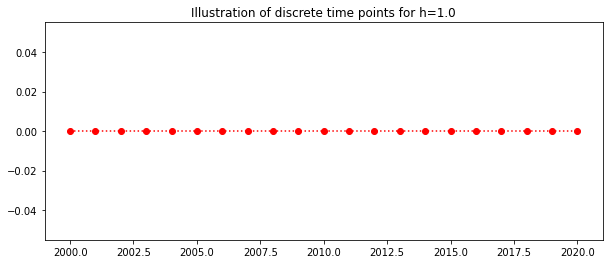

21

In [2]:
### DISCRETE TIME
N=20
t_end=2020.0
t_start=2000.0
h=((t_end-t_start)/N)
t=np.arange(t_start,t_end+h/2,h)

## PLOTS TIME
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red')
plt.title('Illustration of discrete time points for h=%s'%(h))
plt.show()
len(t)

# 1. Linear Population Equation
## Exact Solution 
The linear population equation
\begin{equation} y^{'}=0.1y, \ \ (2000 \leq t \leq 2020), \end{equation}
with the initial condition,
\begin{equation}y(2000)=6.\end{equation}
has a known exact (analytic) solution
\begin{equation} y(t)=6e^{0.1(t-2000)}. \end{equation}

## Specific 1 step Adams Moulton
The specific 1 step Adams Moulton for the linear population equation is:

\begin{equation}w_{i+1}=w_{i}+\frac{h}{2}\big[0.1w_{i+1}+0.1w_i\big] \end{equation}
where
\begin{equation}f(t,y)=0.1y,\end{equation}

In [3]:
## THIS IS THE RIGHT HANDSIDE OF THE LINEAR POPULATION DIFFERENTIAL 
## EQUATION
def linfun(t,w):
    ftw=0.1*w
    return ftw

re-arranging,
\begin{equation} \big(1-\frac{h}{2}(0.1)\big)w_{i+1}=w_i+\frac{h}{2}\big[0.1w_i\big], \end{equation}
\begin{equation} w_{i+1}=\frac{w_i+\frac{h}{2}\big[0.1w_i\big]}{\big(1-\frac{h}{2}(0.1)\big)}. \end{equation}




In [4]:
### INSERT METHOD HERE
w=np.zeros(N+1) # a list of 2000+1 zeros
w[0]=6 # INITIAL CONDITION
for i in range(0,N):
    w[i+1]=(w[i]+h/2*(linfun(t[i],w[i])))/(1-0.1*h/2)


## Plotting Results

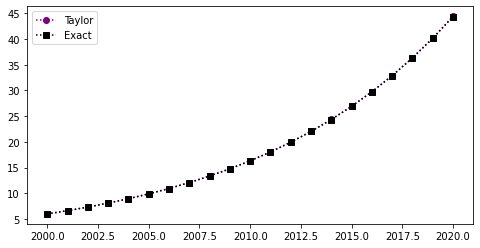

In [5]:
## PLOTTING METHOD
y=6*np.exp(0.1*(t-2000)) # EXACT SOLUTION
fig = plt.figure(figsize=(8,4))
plt.plot(t,w,'o:',color='purple',label='Taylor')
plt.plot(t,y,'s:',color='black',label='Exact')
plt.legend(loc='best')
plt.show()

## Table
The table below shows the time, the numerical approximation, $w$,  the exact solution, $y$, and the exact error $|y(t_i)-w_i|$ for the linear population equation:

In [6]:
d = {'time t_i': t, 'Adams Approx w': w}
df = pd.DataFrame(data=d)
df

,time t_i,Adams Approx w
0,2000.0,6.000000
1,2001.0,6.631579
2,2002.0,7.329640
3,2003.0,8.101181
4,2004.0,8.953937
5,2005.0,9.896456
6,2006.0,10.938189
7,2007.0,12.089577
8,2008.0,13.362164
9,2009.0,14.768708


## 2. Non-Linear Population Equation 
\begin{equation} y^{'}=0.2y-0.01y^2, \ \ (2000 \leq t \leq 2020), \end{equation}
with the initial condition,
\begin{equation}y(2000)=6.\end{equation}
## Specific 1 step Adams-Moutlon method for the Non-Linear Population Equation
The specific Adams-Moulton difference equation for the non-linear population equations is:

\begin{equation}w_{i+1}=w_{i}+\frac{h}{2}\big[ 0.2 w_{i+1}-0.01 w_{i+1}^2 
                                + 0.2 w_i-0.01 w_i^2\big] \end{equation}
re-arranging 
\begin{equation}w_{i+1}-\frac{h}{2}\big( 0.2 w_{i+1}-0.01 w_{i+1}^2 \big)=w_{i}+\frac{h}{2}
                                \big[ 0.2 w_i-0.01 w_i^2\big] \end{equation}


for $i=0,...,199$, where $w_i$ is the numerical approximation of $y$ at time $t_i$, with step size $h$ and the initial condition
\begin{equation}w_0=6.\end{equation}

PROBLEM WE CANNOT MOVE THE SQUARED (NON-LINEAR TERM) TO THE RIGHT HAND SIDE SO WE CAN SOLVE FOR w[i+1].
For this reason we will use a predictor-corrector method,
The predictor will be the 2-step Adams Bashforth
\begin{equation} w_{i+1}^{p}=w_{i}+\frac{h}{2}\big[ 3(0.2 w_{i}-0.01 w_{i}^2) 
                                - (0.2 w_{i-1}-0.01 w_{i-1}^2) \big], \end{equation}
with the corrector being the 1-step Adams Moulton,
\begin{equation}w_{i+1}=w_{i}+\frac{h}{2}\big[ 0.2 w_{i+1}^p-0.01 (w^p_{i+1})^2 
                                + 0.2 w_i-0.01 w_i^2\big], \end{equation}      
for i=1,...200.
                                

In [7]:
def nonlinfun(t,w):
    ftw=0.2*w-0.01*w*w
    return ftw

In [8]:
### INSERT METHOD HERE
w=np.zeros(N+1)
w_p=np.zeros(N+1)
w[0]=6
w[1]=6.084 # FROM THE THE TAYLOR METHOD
w_p[0]=6
w_p[1]=6.084 # FROM THE THE TAYLOR METHOD
for n in range(1,N):
    ## Predictor
    w_p[n+1]=w[n]+h/2*(3*nonlinfun(t[n],w[n])-
                       nonlinfun(t[n-1],w[n-1]))
    ## Corrector
    w[n+1]=w[n]+h/2*(nonlinfun(t[n+1],w_p[n+1])+
                       nonlinfun(t[n],w[n]))

## Results
The plot below shows the numerical approximation, $w$ (circles) for the non-linear population equation:

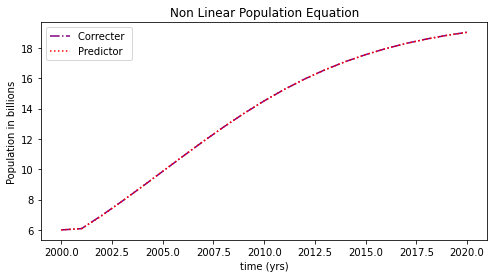

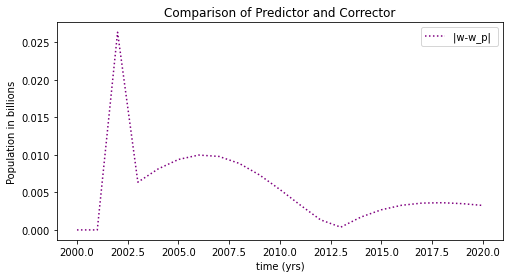

In [9]:
fig = plt.figure(figsize=(8,4))
plt.plot(t,w,'-.',color='purple',label='Correcter ')
plt.plot(t,w_p,':',color='red',label='Predictor ')

plt.title('Non Linear Population Equation')
plt.legend(loc='best')
plt.xlabel('time (yrs)')
plt.ylabel('Population in billions')
plt.show()

fig = plt.figure(figsize=(8,4))
plt.plot(t,np.abs(w-w_p),':',color='purple',label='|w-w_p| ')
plt.title('Comparison of Predictor and Corrector')
plt.legend(loc='best')
plt.xlabel('time (yrs)')
plt.ylabel('Population in billions')
plt.show()



## Table
The table below shows the time and the numerical approximation, $w$,  for the non-linear population equation:

In [10]:
d = {'time t_i': t, 'Adams Approx w': w}
df = pd.DataFrame(data=d)
df

,time t_i,Adams Approx w
0,2000.0,6.000000
1,2001.0,6.084000
2,2002.0,6.960322
3,2003.0,7.892040
4,2004.0,8.863456
5,2005.0,9.856908
6,2006.0,10.853082
7,2007.0,11.832473
8,2008.0,12.776881
9,2009.0,13.670688


## 3. Non-Linear Population Equation with an oscilation 
\begin{equation} y^{'}=0.2y-0.01y^2+\sin(2\pi t), \ \ (2000 \leq t \leq 2020), \end{equation}
with the initial condition,
\begin{equation}y(2000)=6.\end{equation}

## Specific 2 Step Adams Moulton for the Non-Linear Population Equation with an oscilation

The specific Adams-Moulton difference equation for the non-linear population equations is:

           
\begin{equation}w_{i+1}=w_{i}+\frac{h}{2}\big[ 0.2 w_{i+1}-0.01 w_{i+1}^2 +\sin(2\pi t_{i+1})
                                + 0.2 w_i-0.01 w_i^2+\sin(2\pi t_{i})\big] \end{equation}


for $i=1,...,199$, where $w_i$ is the numerical approximation of $y$ at time $t_i$, with step size $h$ and the initial condition
\begin{equation}w_0=6.\end{equation}

 As $w_1$ is required for the method but unknown we will use the numerical solution of a one step method to approximate the value. Here, we use the 2nd order Runge Kutta approximation (see [Runge Kutta notebook](https://github.com/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2003%20-%20Runge%20Kutta/01_2nd%20Order%20Runge%20Kutta%20Population%20Equations.ipynb) )
\begin{equation}w_1=6.11.\end{equation}


PROBLEM WE CANNOT MOVE THE SQUARED (NON-LINEAR TERM) TO THE RIGHT HAND SIDE SO WE CAN SOLVE FOR w[i+1].
For this reason we will use a predictor-corrector method,
The predictor will be the 2-step Adams Bashforth
\begin{equation} w_{i+1}^{p}=w_{i}+\frac{h}{2}\big[ 3(0.2 w_{i}-0.01 w_{i}^2+\sin(2\pi t_{i}) 
                                - (0.2 w_{i-1}-0.01 w_{i-1}^2+\sin(2\pi t_{i-1}) \big] \end{equation}
with the corrector being the 1-step Adams Moulton,
\begin{equation}w_{i+1}=w_{i}+\frac{h}{2}\big[ 0.2 w_{i+1}^p-0.01 (w^p_{i+1})^2 +\sin(2\pi t_{i+1}
                                + 0.2 w_i-0.01 w_i^2+\sin(2\pi t_{i}\big], \end{equation}    

                                





In [15]:
def nonlin_oscfun(t,w):
    ftw=0.2*w-0.01*w*w+np.sin(2*np.math.pi*t)
    return ftw

In [16]:
## INSERT METHOD HERE
w=np.zeros(N+1)
w[0]=6
w[1]=6.11
for n in range(1,N):
    w[n+1]=w[n]+h/2

## Results
The plot below shows the  numerical approximation, $w$ (circles) for the non-linear population equation:

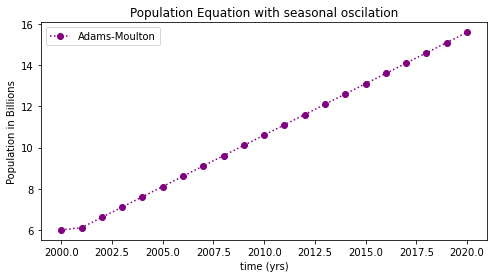

In [17]:
fig = plt.figure(figsize=(8,4))
plt.plot(t,w,'o:',color='purple',label='Adams-Moulton')
plt.title('Population Equation with seasonal oscilation')
plt.xlabel('time (yrs)')
plt.ylabel('Population in Billions')
plt.legend(loc='best')
plt.show()

## Table
The table below shows the time and the numerical approximation, $w$,  for the non-linear population equation:

In [18]:
d = {'time t_i': t, 'Adams Approx w': w}
df = pd.DataFrame(data=d)
df


,time t_i,Adams Approx w
0,2000.0,6.00
1,2001.0,6.11
2,2002.0,6.61
3,2003.0,7.11
4,2004.0,7.61
5,2005.0,8.11
6,2006.0,8.61
7,2007.0,9.11
8,2008.0,9.61
9,2009.0,10.11
